## DBSCAN

In [1]:
# Surpress any warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn
import string

import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.manifold import TSNE
from sklearn.datasets import load_digits

import seaborn as sns

sns.set_context('notebook')
sns.set_style('white')

# Import matplotlib for 3d plotting:
import matplotlib.pyplot as plt

# Make matplotlib work in jupyter notebook
%matplotlib inline

DBSCAN is a clustering algorithm that stands for:

"Density-Based Spatial Clustering of Applications with Noise"

Density-Based - DBSCAN will group points that are densely-packed together
Spacial-Clustering - DBSCAN is for numerical points  ∈ℝ𝑛
 
Applications with Noise - DBSCAN is great for applications that have noise
This is because DBSCAN also finds outliers/noise in data

How does DBSCAN work?¶
DBSCAN uses two parameters:

eps (aka epsilon -  𝜖
 ) - the max distance between two points for them to be considered "in the same neighborhood"
min_samples - the minimum number of neighbors a point needs to be considered a core point.
If a point is a neighbor of a core point, then it's in the same cluster as that point.

Otherwise, it's considered to be noise.

In [2]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/data/example1.csv')
df.head(n=6)

,0,1
0,-3,0
1,0,-3
2,0,0
3,0,3
4,3,0
5,6,0


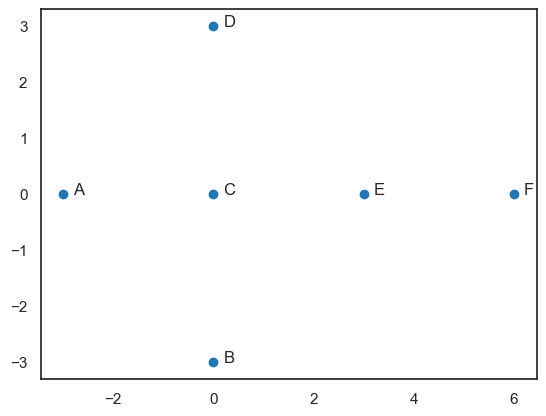

In [3]:
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']
plt.scatter(df['0'], df['1'])
for t, p in zip(string.ascii_uppercase, df.iterrows()):
    plt.annotate(t, (p[1][0] + 0.2, p[1][1]))
plt.show()

The point  𝐶
  is the only point that has min_samples=4 or more points within a distance of eps=3.
This makes  𝐶
  the only core point in the dataset.
Points  𝐴
 ,  𝐵
 ,  𝐷
 , and  𝐸
  are within eps=3 units from  𝐶
 .
This means  𝐴
 ,  𝐵
 ,  𝐷
 , and  𝐸
  will be in the same cluster as  𝐶
 .
Finally, point  𝐹
  is not within eps=3 units of a core point
𝐹
  will be labeled as noise.

In [4]:
cluster = DBSCAN(eps=3, min_samples=4)
cluster.fit(df)
print(f'DBSCAN found {len(set(cluster.labels_) - set([-1]))} clusters and {(cluster.labels_ == -1).sum()} points of noise.')

DBSCAN found 1 clusters and 1 points of noise.


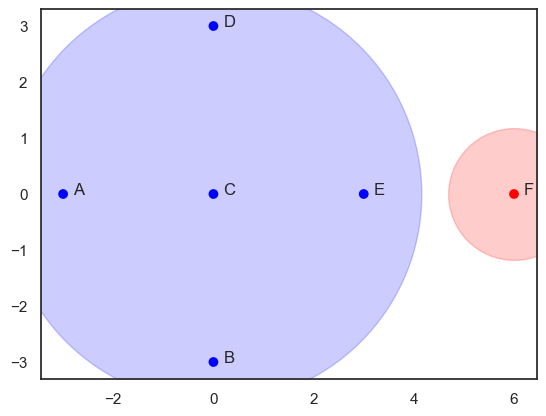

In [7]:
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']
plt.scatter(df['0'], df['1'], c=[['blue', 'red'][l] for l in cluster.labels_])
plt.scatter(0, 0, c='blue', alpha=0.2, s=90000)
plt.scatter(6, 0, c='red', alpha=0.2, s=9000)
for t, p in zip(string.ascii_uppercase, df.iterrows()):
    plt.annotate(t, (p[1][0] + 0.2, p[1][1]))
plt.show()

## Proving Someone has bad handwriting

In [8]:
df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%202/data/012.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,y
0,0,0,0,0,16,13,14,14,0,0,...,0,0,0,11,15,14,14,0,0,0
1,0,16,10,0,0,0,0,0,0,0,...,14,0,0,0,0,-1,2,13,7,1
2,0,12,14,6,5,3,0,0,0,16,...,0,0,10,11,0,0,2,14,8,2


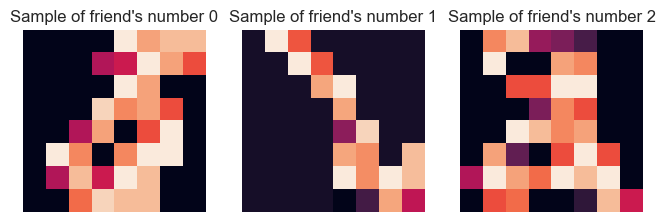

In [9]:
friend_digits = df.iloc[:, df.columns != 'y'].to_numpy()
plt.rcParams['figure.figsize'] = (8,6)
it = (x.reshape(8, 8) for x in friend_digits)
c = 3
fig, ax = plt.subplots(1, c, sharex='col', sharey='row')
for j in range(c):
    ax[j].axis('off')
    ax[j].set_title(f'Sample of friend\'s number {j}')
    ax[j].imshow(next(it))
plt.show()
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']

In [10]:
# Load the data
digits, y = load_digits(return_X_y=True)
pd.DataFrame(digits).head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


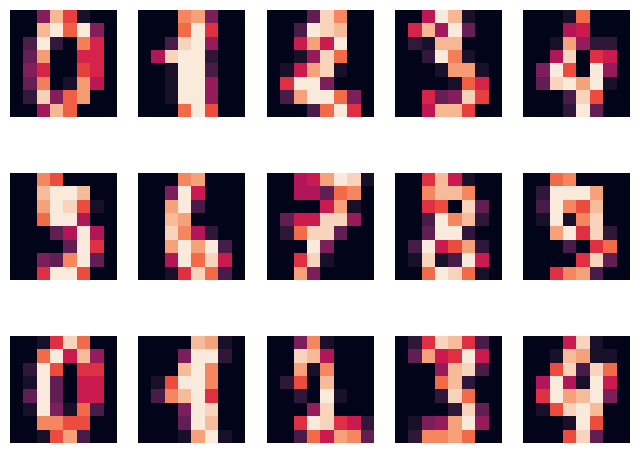

In [11]:
plt.rcParams['figure.figsize'] = (8,6)
it = (x.reshape(8, 8) for x in digits)
r, c = 3, 5
fig, ax = plt.subplots(r, c, sharex='col', sharey='row')
for i in range(r):
    for j in range(c):
        ax[i, j].axis('off')
        ax[i, j].imshow(next(it))
plt.show()
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']

In [12]:
# Use np.r_ to concatenate two rows:
data = np.r_[digits, friend_digits]
y = np.r_[y, df['y']]

In [14]:
embedding = TSNE(n_components=2,
        init="pca",
        max_iter=500,  # Changed from n_iter
        perplexity=10,
        random_state=0)

In [15]:
e_data = embedding.fit_transform(data)

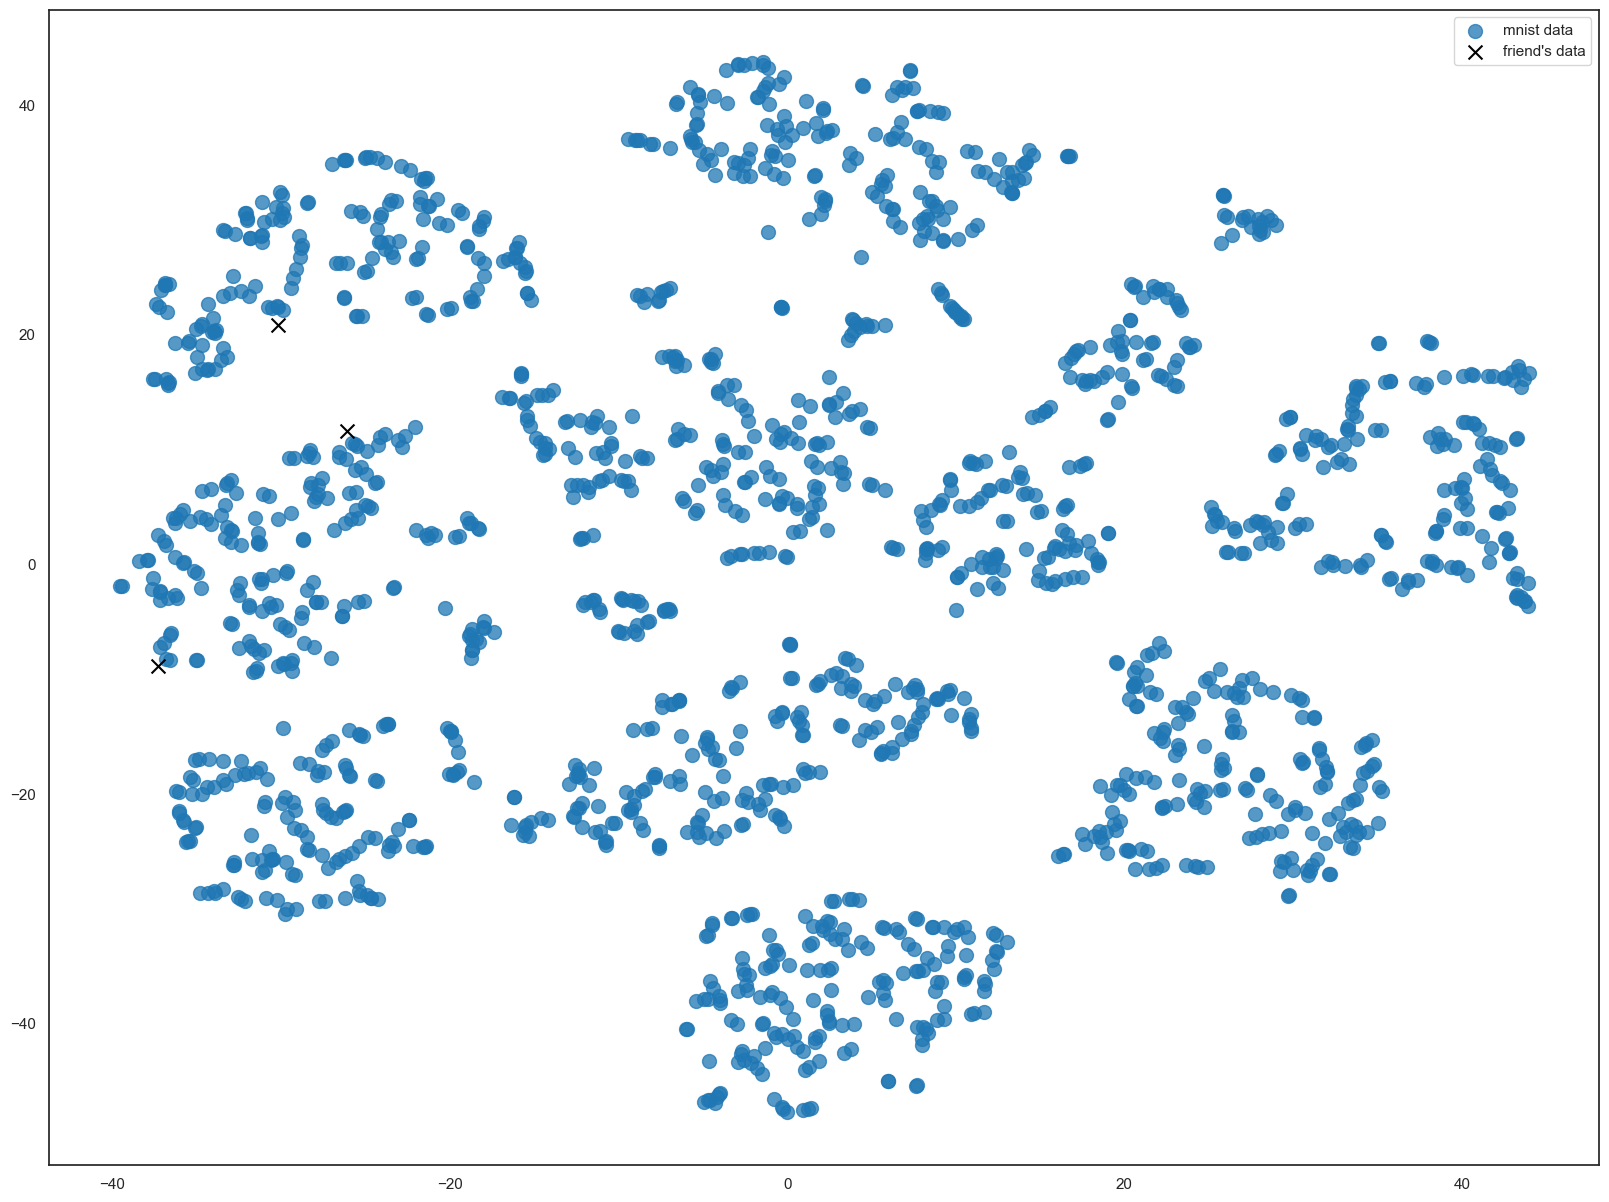

In [16]:
plt.rcParams['figure.figsize'] = (20,15)
n = friend_digits.shape[0]
plt.scatter(
    e_data[:-n, 0],
    e_data[:-n, 1],
    marker='o',
    alpha=0.75,
    label='mnist data',
    s=100)
plt.scatter(
    e_data[-n:, 0],
    e_data[-n:, 1],
    marker='x',
    color='black',
    label='friend\'s data',
    alpha=1,
    s=100)
plt.legend(bbox_to_anchor=[1, 1])
plt.show()
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']

In [17]:
cluster = DBSCAN(eps=5, min_samples=20)
cluster.fit(e_data)
print(f'DBSCAN found {len(set(cluster.labels_) - set([-1]))} clusters and {(cluster.labels_ == -1).sum()} points of noise.')

DBSCAN found 12 clusters and 25 points of noise.


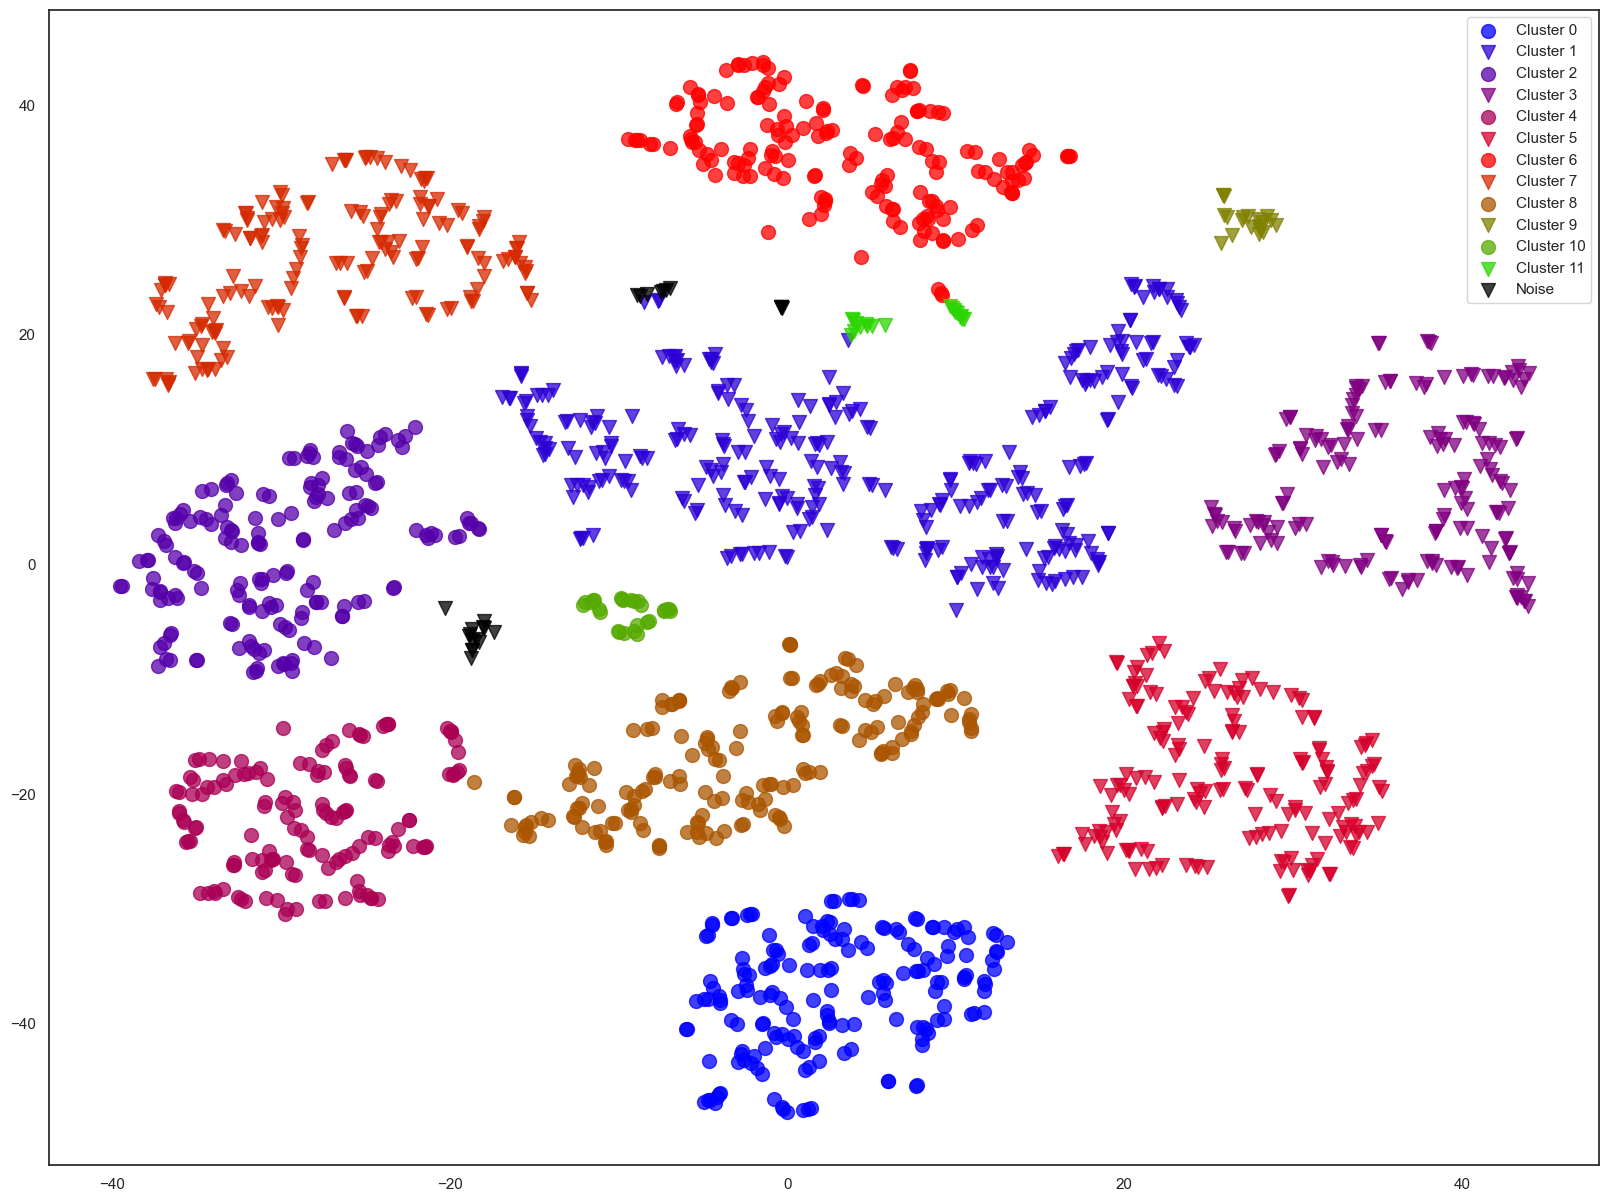

In [18]:
plt.rcParams['figure.figsize'] = (20,15)
unique_labels = set(cluster.labels_)
n_labels = len(unique_labels)
cmap = plt.cm.get_cmap('brg', n_labels)
for l in unique_labels:
    plt.scatter(
        e_data[cluster.labels_ == l, 0],
        e_data[cluster.labels_ == l, 1],
        c=[cmap(l) if l >= 0 else 'Black'],
        marker='ov'[l%2],
        alpha=0.75,
        s=100,
        label=f'Cluster {l}' if l >= 0 else 'Noise')
plt.legend(bbox_to_anchor=[1, 1])
plt.show()
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']

In [19]:
print("The predicted labels of our friend's handwriting:")
print(cluster.labels_[-3:])

The predicted labels of our friend's handwriting:
[2 7 2]


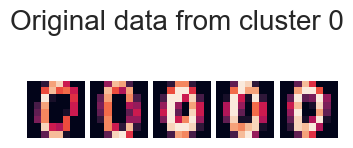

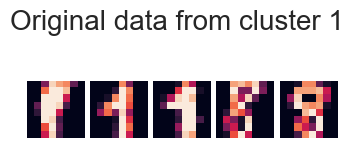

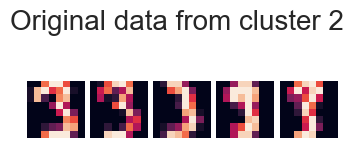

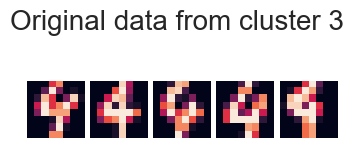

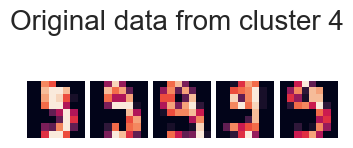

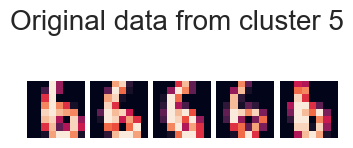

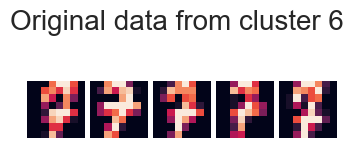

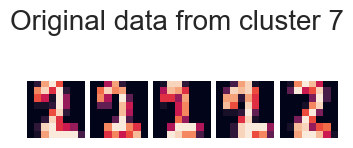

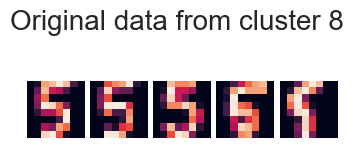

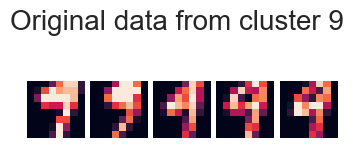

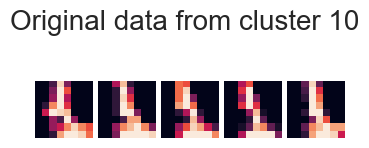

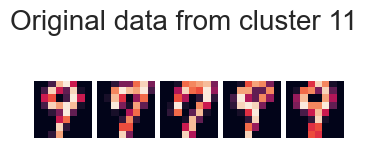

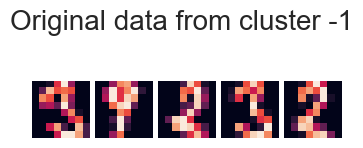

In [20]:
r, c = 1, 5
plt.rcParams['figure.figsize'] = (4*r,4*c)
for label in unique_labels:
    cluster_data = data[cluster.labels_ == label]
    nums = cluster_data[np.random.choice(len(cluster_data), r * c, replace=False)]
    it = (x.reshape(8, 8) for x in nums)
    fig, ax = plt.subplots(r, c)
    ax = ax.reshape(r, c)
    plt.subplots_adjust(wspace=0.1, hspace=-0.69)
    fig.suptitle(f'Original data from cluster {label}', fontsize=20, y=0.545)
    for i in range(r):
        for j in range(c):
            ax[i, j].axis('off')
            ax[i, j].imshow(next(it))
plt.show()
plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']

Correct labels:


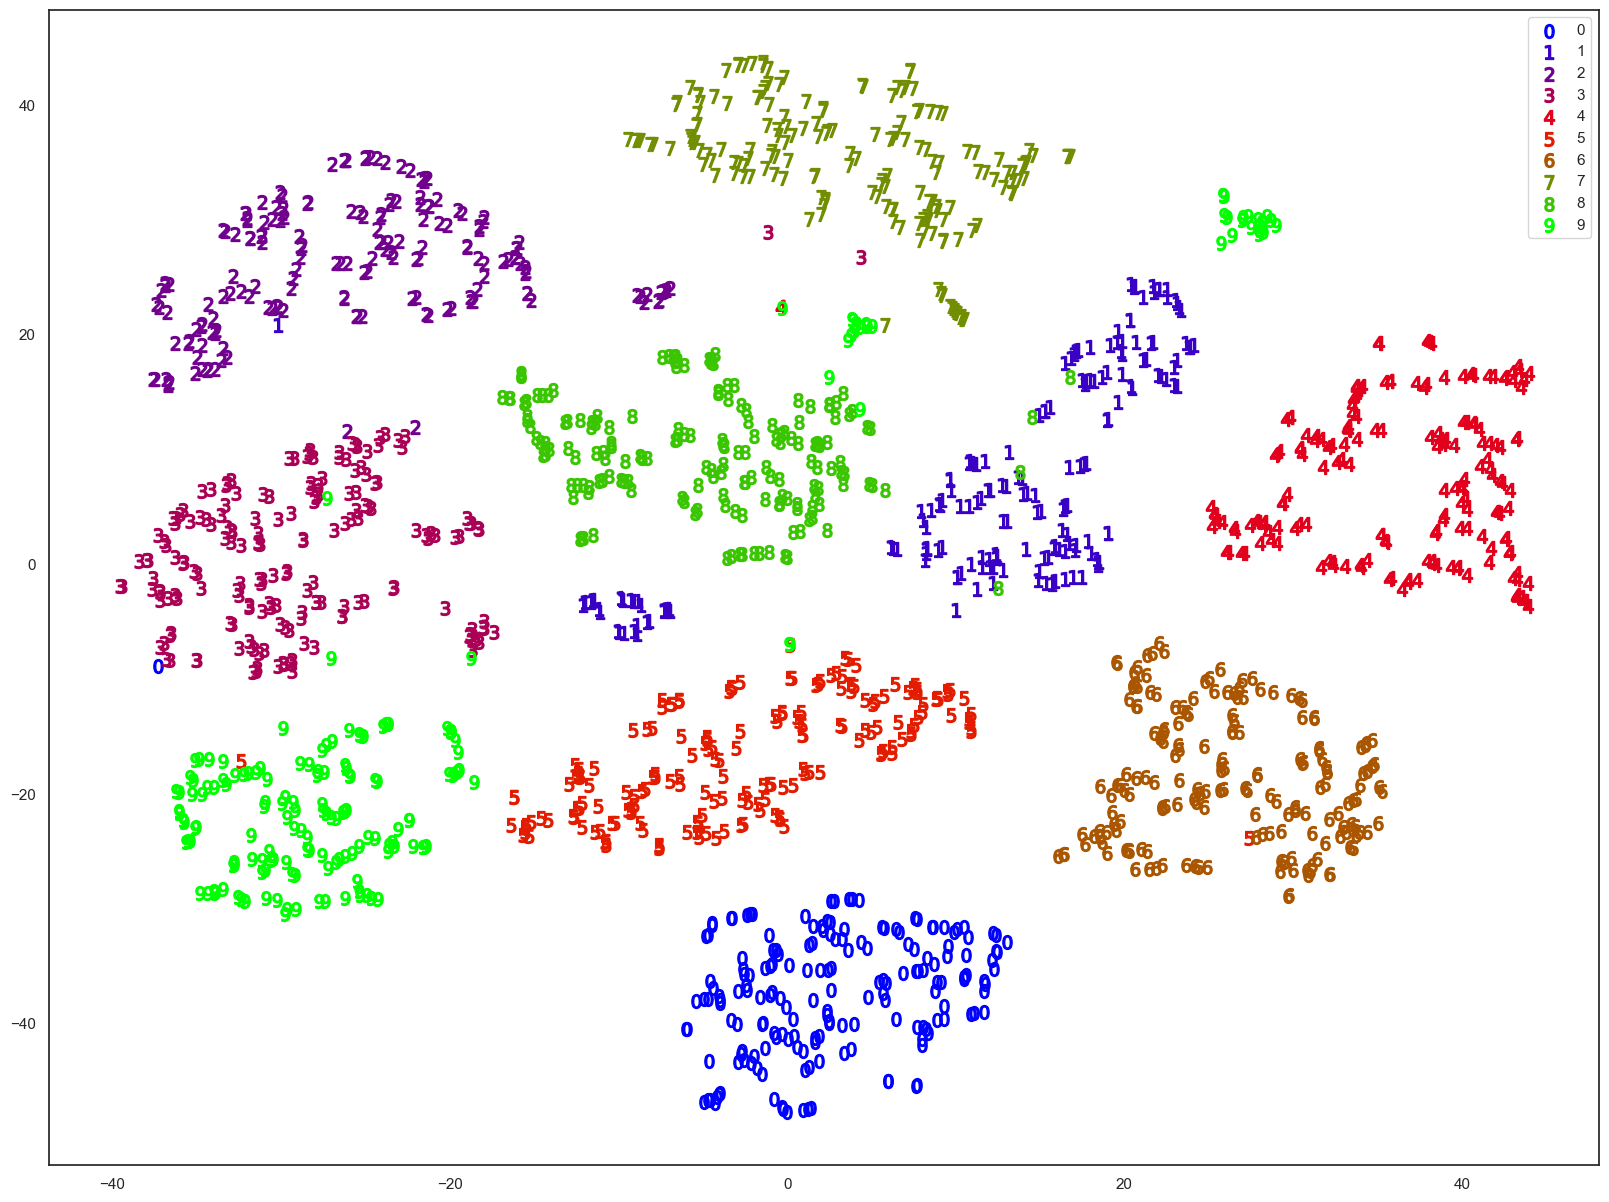

In [21]:
print('Correct labels:')
plt.rcParams['figure.figsize'] = (20,15)

unique_labels = set(y)
n_labels = len(unique_labels)
cmap = plt.cm.get_cmap('brg', n_labels)
for l in unique_labels:
    plt.scatter(
        e_data[y == l, 0],
        e_data[y == l, 1],
        c=[cmap(l)],
        marker=f'${l}$',
        alpha=1,
        label=f'{l}',
        s=100)
plt.legend(bbox_to_anchor=[1, 1])
plt.show()

In [22]:
for i, (l, t) in enumerate(zip(cluster.labels_[-3:], y[-3:])):
    print('-' * 30)
    print(f'Your friend\'s {i}th sample was categorized as being in cluster #{l}')
    if l == -1:
        print('(IE: Noise)')
    else:
        v, c = np.unique(y[cluster.labels_ == l], return_counts=True)
        mfreq = v[np.argmax(c)]
        ratio = c.max() / c.sum()
        print(f'Cluster {l} is {ratio * 100:.2f}% the number {mfreq}')
        
    print(f'Your friend\'s {i}th sample is supposed to be the number {t}')

------------------------------
Your friend's 0th sample was categorized as being in cluster #2
Cluster 2 is 97.11% the number 3
Your friend's 0th sample is supposed to be the number 0
------------------------------
Your friend's 1th sample was categorized as being in cluster #7
Cluster 7 is 99.40% the number 2
Your friend's 1th sample is supposed to be the number 1
------------------------------
Your friend's 2th sample was categorized as being in cluster #2
Cluster 2 is 97.11% the number 3
Your friend's 2th sample is supposed to be the number 2
